In [ ]:
import os
import pandas as pd
from ultralytics import YOLO
import xml.etree.ElementTree as ET

In [ ]:
# Check XML file contents

import xml.etree.ElementTree as ET

# Specify XML file path
xml_path = r'C:\project\pet_insurance\archive\annotations\Annotation\n02085620-Chihuahua\n02085620_7'

# Parse XML file
tree = ET.parse(xml_path)
root = tree.getroot()

# Display XML file contents
for elem in root.iter():
    print(f"Tag: {elem.tag}, Attributes: {elem.attrib}, Text: {elem.text}")

# Selectively extract necessary information
print("\n--- Detailed Content ---")
for object in root.findall('object'):
    name = object.find('name').text
    pose = object.find('pose').text
    truncated = object.find('truncated').text
    difficult = object.find('difficult').text

    # Bounding box coordinates
    bndbox = object.find('bndbox')
    xmin = bndbox.find('xmin').text
    ymin = bndbox.find('ymin').text
    xmax = bndbox.find('xmax').text
    ymax = bndbox.find('ymax').text

    print(f"Name: {name}, Pose: {pose}, Truncated: {truncated}, Difficult: {difficult}")
    print(f"Bndbox -> xmin: {xmin}, ymin: {ymin}, xmax: {xmax}, ymax: {ymax}")

Tag: annotation, Attributes: {}, Text: 
	
Tag: folder, Attributes: {}, Text: 02085620
Tag: filename, Attributes: {}, Text: n02085620_7
Tag: source, Attributes: {}, Text: 
		
Tag: database, Attributes: {}, Text: ImageNet database
Tag: size, Attributes: {}, Text: 
		
Tag: width, Attributes: {}, Text: 250
Tag: height, Attributes: {}, Text: 188
Tag: depth, Attributes: {}, Text: 3
Tag: segment, Attributes: {}, Text: 0
Tag: object, Attributes: {}, Text: 
		
Tag: name, Attributes: {}, Text: Chihuahua
Tag: pose, Attributes: {}, Text: Unspecified
Tag: truncated, Attributes: {}, Text: 0
Tag: difficult, Attributes: {}, Text: 0
Tag: bndbox, Attributes: {}, Text: 
			
Tag: xmin, Attributes: {}, Text: 71
Tag: ymin, Attributes: {}, Text: 1
Tag: xmax, Attributes: {}, Text: 192
Tag: ymax, Attributes: {}, Text: 180

--- Detailed Content ---
Name: Chihuahua, Pose: Unspecified, Truncated: 0, Difficult: 0
Bndbox -> xmin: 71, ymin: 1, xmax: 192, ymax: 180


xmin: 68, ymin: 9
xmax: 165, ymax: 91


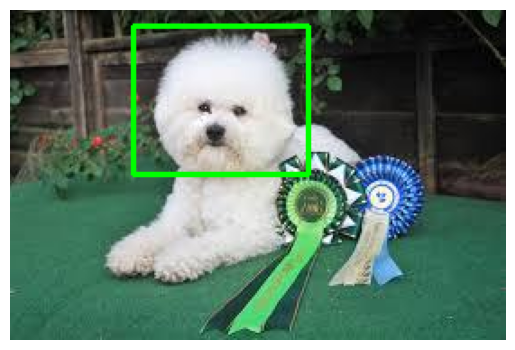

In [ ]:
# Manually set bounding box coordinates (Relative coordinates must be defined)

import cv2
import matplotlib.pyplot as plt

# Load image
image_path = r'C:\project\pet_insurance\archive1\dog_add\n24112001-Bichon_frise\n24112001_193.jpg'  # Image path
image = cv2.imread(image_path)

# Check if the image is loaded correctly
if image is None:
    raise FileNotFoundError(f"Cannot load image. Please check the path: {image_path}")

# Convert to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Get image dimensions
height, width, _ = image.shape

# Relative coordinates (proportional to image size)
x_min_rel, y_min_rel = 0.25, 0.05
x_max_rel, y_max_rel = 0.6, 0.5

# Convert to absolute coordinates
xmin, ymin = int(width * x_min_rel), int(height * y_min_rel)
xmax, ymax = int(width * x_max_rel), int(height * y_max_rel)

# Print bounding box coordinates
print(f"xmin: {xmin}, ymin: {ymin}")
print(f"xmax: {xmax}, ymax: {ymax}")

# Draw bounding box (green)
cv2.rectangle(image_rgb, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

# Display image
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


In [ ]:
# Rename files in a folder
import os

def rename_files(folder_path, old_text, new_text):
    """
    Rename files in a folder by replacing specific text with new text.
    - folder_path: Path to the folder containing files
    - old_text: Text to be replaced
    - new_text: New text to replace the old one
    """
    for filename in os.listdir(folder_path):
        if old_text in filename:
            new_name = filename.replace(old_text, new_text)
            old_file = os.path.join(folder_path, filename)
            new_file = os.path.join(folder_path, new_name)
            os.rename(old_file, new_file)
            print(f"Renamed: {filename} → {new_name}")

# Example usage
rename_files(r"C:\project\pet_insurance\dog_add\n24112001-Bichon_frise", "Bichon_Frise", "n24112001")  # Change spaces to underscores (_)


In [ ]:
# Automatically generate bounding boxes for images (YOLO sets bounding boxes automatically with conf=0.1)

from ultralytics import YOLO

# Initialize the model with your custom-trained 'best.pt'
model = YOLO('yolov8n.pt')

# Run prediction
results = model('./dog_add/n24112001-Bichon_frise/n24112001_94.jpg', conf=0.1)

# Loop through detections
for result in results:  # Iterate over results
    for box in result.boxes:  # Access bounding boxes in each result
        x1, y1, x2, y2 = box.xyxy[0]  # Bounding box coordinates
        conf = box.conf[0].item()  # Confidence score
        cls = box.cls[0].item()  # Detected class ID
        print(f"Coordinates: {x1}, {y1}, {x2}, {y2}, Conf: {conf}, Class: {cls}")



image 1/1 c:\project\pet_insurance\dog_add\n24112001-Bichon_frise\n24112001_94.jpg: 640x480 1 person, 124.7ms
Speed: 2.0ms preprocess, 124.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Coordinates: 85.89818572998047, 65.98636627197266, 152.91717529296875, 215.2495880126953, Conf: 0.16674461960792542, Class: 0.0


In [ ]:
# Save multiple images' width, height, and bounding box information to a CSV file

import os
import pandas as pd
from ultralytics import YOLO

# Initialize YOLO model
model = YOLO('yolov8n.pt')

# Define image folder path and list image files
image_dir = './archive1/dog_add/n24112001-Bichon_frise'
image_files = [os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.endswith(('.jpg', '.png'))]

# List to store detection results
detections = []

# Process multiple images
for image_path in image_files:
    results = model(image_path, conf=0.1)
    for result in results:
        # Extract image dimensions
        width, height = result.orig_shape[1], result.orig_shape[0]  # (width, height)

        for box in result.boxes:  # Create bounding box
            x1, y1, x2, y2 = map(lambda x: int(round(x.item())), box.xyxy[0])  # Convert to integer coordinates
            conf = round(box.conf[0].item(), 2)  # Confidence score
            cls = int(box.cls[0].item())  # Detected class ID

            detections.append({
                'image_path': image_path,   # Image path
                'width': width,             # Image width (pixels)
                'height': height,           # Image height (pixels)
                'x1': x1, 'y1': y1, 'x2': x2, 'y2': y2,  # Bounding box coordinates
                'confidence': conf,         # Confidence score
                'class_id': cls             # Class ID
            })

# Save as a DataFrame
df = pd.DataFrame(detections)

# Save as CSV file
df.to_csv('detection_results_with_dimensions_0.1.csv', index=False)

print("Detection results saved to 'detection_results_with_dimensions_0.1.csv'.")




image 1/1 c:\project\pet_insurance\archive1\dog_add\n24112001-Bichon_frise\n24112001_100.jpg: 640x480 (no detections), 132.6ms
Speed: 3.0ms preprocess, 132.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\project\pet_insurance\archive1\dog_add\n24112001-Bichon_frise\n24112001_101.jpg: 448x640 1 teddy bear, 116.7ms
Speed: 1.0ms preprocess, 116.7ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 c:\project\pet_insurance\archive1\dog_add\n24112001-Bichon_frise\n24112001_103.jpg: 640x640 1 person, 148.6ms
Speed: 4.0ms preprocess, 148.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 c:\project\pet_insurance\archive1\dog_add\n24112001-Bichon_frise\n24112001_104.jpg: 480x640 1 sheep, 1 teddy bear, 115.7ms
Speed: 3.0ms preprocess, 115.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\project\pet_insurance\archive1\dog_add\n24112001-Bichon_frise\n24112001_105.jpg: 640x4

In [ ]:
# Code to save multiple annotations at once
import os
import pandas as pd
import xml.etree.ElementTree as ET

def create_custom_voc_xml(folder, filename, source, size, segment, objects, output_dir="annotation_add"):
    """
    Generate an ImageNet Pascal VOC-style XML file.
    - folder: Folder name
    - filename: File name
    - source: Database name
    - size: Image size {"width": width, "height": height, "depth": depth}
    - segment: Segmentation info (0)
    - objects: Object information [{"name": "class_name", "bbox": [xmin, ymin, xmax, ymax]}]
    - output_dir: Directory to save the XML file
    """
    annotation = ET.Element("annotation")
    ET.SubElement(annotation, "folder").text = folder
    ET.SubElement(annotation, "filename").text = filename

    # Source information
    source_element = ET.SubElement(annotation, "source")
    ET.SubElement(source_element, "database").text = source

    # Image size information
    size_element = ET.SubElement(annotation, "size")
    ET.SubElement(size_element, "width").text = str(size["width"])
    ET.SubElement(size_element, "height").text = str(size["height"])
    ET.SubElement(size_element, "depth").text = str(size["depth"])

    # Segmentation information
    ET.SubElement(annotation, "segment").text = str(segment)

    # Add object information
    for obj in objects:
        obj_element = ET.SubElement(annotation, "object")
        ET.SubElement(obj_element, "name").text = obj["name"]
        ET.SubElement(obj_element, "pose").text = "Unspecified"
        ET.SubElement(obj_element, "truncated").text = "0"
        ET.SubElement(obj_element, "difficult").text = "0"

        # Bounding Box information
        bbox = ET.SubElement(obj_element, "bndbox")
        xmin, ymin, xmax, ymax = obj["bbox"]
        ET.SubElement(bbox, "xmin").text = str(xmin)
        ET.SubElement(bbox, "ymin").text = str(ymin)
        ET.SubElement(bbox, "xmax").text = str(xmax)
        ET.SubElement(bbox, "ymax").text = str(ymax)

    # Save XML file
    os.makedirs(output_dir, exist_ok=True)
    xml_path = os.path.join(output_dir, f"{filename}.xml")
    tree = ET.ElementTree(annotation)
    tree.write(xml_path, encoding="utf-8", xml_declaration=True)
    print(f"Saved: {xml_path}")

# Read data from CSV
csv_file = 'detection_results_with_dimensions_0.1.csv'
df = pd.read_csv(csv_file)

# Directory to save XML files
output_dir = "annotation_add"

# Process images and generate XML files
for image_path, group in df.groupby('image_path'):
    folder = os.path.basename(os.path.dirname(image_path))  # Extract folder name
    filename = os.path.splitext(os.path.basename(image_path))[0]  # Extract file name
    source = "ImageNet"
    width = group['width'].iloc[0]  # Image width
    height = group['height'].iloc[0]  # Image height
    size = {"width": width, "height": height, "depth": 3}
    segment = 0

    # Extract object information
    objects = []
    for _, row in group.iterrows():
        objects.append({
            "name": f"class_{row['class_id']}",  # Class name
            "bbox": [row['x1'], row['y1'], row['x2'], row['y2']]
        })

    # Generate XML file
    create_custom_voc_xml(folder, filename, source, size, segment, objects, output_dir)


Saved: annotation_add\n24112001_100
Saved: annotation_add\n24112001_101
Saved: annotation_add\n24112001_103
Saved: annotation_add\n24112001_104
Saved: annotation_add\n24112001_105
Saved: annotation_add\n24112001_106
Saved: annotation_add\n24112001_107
Saved: annotation_add\n24112001_108
Saved: annotation_add\n24112001_111
Saved: annotation_add\n24112001_112
Saved: annotation_add\n24112001_113
Saved: annotation_add\n24112001_116
Saved: annotation_add\n24112001_117
Saved: annotation_add\n24112001_119
Saved: annotation_add\n24112001_120
Saved: annotation_add\n24112001_121
Saved: annotation_add\n24112001_123
Saved: annotation_add\n24112001_125
Saved: annotation_add\n24112001_127
Saved: annotation_add\n24112001_129
Saved: annotation_add\n24112001_130
Saved: annotation_add\n24112001_131
Saved: annotation_add\n24112001_133
Saved: annotation_add\n24112001_135
Saved: annotation_add\n24112001_136
Saved: annotation_add\n24112001_137
Saved: annotation_add\n24112001_138
Saved: annotation_add\n24112

In [ ]:
# Check the original image folder and count the number of files inside
breed_list = os.listdir("../pet_insurance/archive1/dog_add")  # Retrieve and store the list of files and folders in the specified directory

num_classes = len(breed_list)                                                          
print("{} breeds".format(num_classes))
print(breed_list)

n_total_images = 0
for breed in breed_list:
    n_total_images += len(os.listdir("../pet_insurance/archive1/dog_add/{}".format(breed)))
print("{} images".format(n_total_images))


1 breeds
['n24112001-Bichon_frise']
117 images


In [ ]:
# Create a folder to store preprocessed images

if not os.path.exists('data1'):  # Create the 'data1' folder in the current working directory (where the Python script is running)
    os.mkdir('data1')

# Create a subfolder for each breed in breed_list under the 'data1' directory
for breed in breed_list:
    os.mkdir('data1/' + breed)

print('Created {} folders to store cropped images of the different breeds.'.format(len(os.listdir('data1'))))


Created 1 folders to store cropped images of the different breeds.


In [ ]:
# Combine original images with annotation data, preprocess them, and save them to the designated folder

from PIL import Image

for breed in os.listdir('data1'):
    for file in os.listdir('../pet_insurance/archive1/annotation_add_0.1/{}'.format(breed)):
        img = Image.open('../pet_insurance/archive1/dog_add/{}/{}.jpg'.format(breed, file))
        tree = ET.parse('../pet_insurance/archive1/annotation_add_0.1/{}/{}'.format(breed, file))

        xmin = int(tree.getroot().findall('object')[0].find('bndbox').find('xmin').text)
        xmax = int(tree.getroot().findall('object')[0].find('bndbox').find('xmax').text)
        ymin = int(tree.getroot().findall('object')[0].find('bndbox').find('ymin').text)
        ymax = int(tree.getroot().findall('object')[0].find('bndbox').find('ymax').text)

        img = img.crop((xmin, ymin, xmax, ymax))  # Crop image based on bounding box
        img = img.convert('RGB')  # Convert image to RGB format
        img = img.resize((224, 224))  # Resize image to 224x224
        img.save('data1/' + breed + '/' + file + '.jpg')  # Save preprocessed image
